In [1]:
import porespy as ps
import numpy as np 
import matplotlib.pyplot as plt
import scipy.ndimage as spim
import scipy.io as sio
from matplotlib import cm



### Load pore structure and LB simulation data

In [2]:
#velocityData = np.loadtxt('velocity.dat')
#velocityData = np.reshape(velocityData,(256,256,256,3))

velocityNormData = np.loadtxt('velocityNorm.dat')
velocityNormData = np.reshape(velocityNormData,(256,256,256))

data = np.loadtxt("newMonoImage_256.txt",delimiter=',')
beadPack = np.reshape(data,(256,256,256))


In [22]:
beadPack = np.transpose(beadPack,(1,2,0))


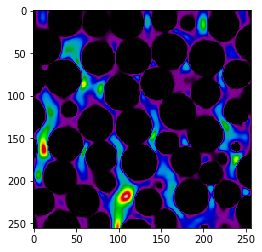

In [26]:
#plt.figure(1)
#plt.imshow(velocityData[:,:,100], cmap=plt.cm.nipy_spectral)

plt.figure(2)
plt.imshow(velocityNormData[:,:,100], cmap=plt.cm.nipy_spectral)

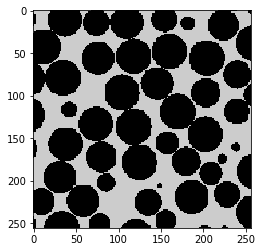

In [27]:
plt.imshow(beadPack[:,:,100],cmap=plt.cm.nipy_spectral)

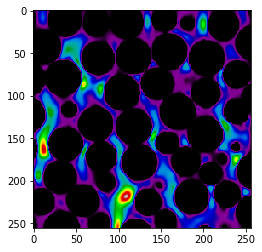

In [28]:
plt.imshow((beadPack*velocityNormData)[:,:,100],cmap=plt.cm.nipy_spectral)

### Compute pore network information

/Users/akendrick/anaconda/lib/python3.6/site-packages/porespy/network_extraction/__snow__.py:210: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  peaks_i = labels[s] == i+1
/Users/akendrick/anaconda/lib/python3.6/site-packages/porespy/network_extraction/__snow__.py:211: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  dt_i = dt[s]
/Users/akendrick/anaconda/lib/python3.6/site-packages/porespy/network_extraction/__snow__.py:226: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead o

____________________________________________________________
Partitioning Pore Space using Marker Based Watershed
Boolean peaks received, applying labeling


/Users/akendrick/anaconda/lib/python3.6/site-packages/skimage/util/arraycrop.py:175: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  cropped = np.array(ar[slices], order=order, copy=True)
  0%|          | 0/965 [00:00<?, ?it/s]

____________________________________________________________
Extracting pore and throat information from image


/Users/akendrick/anaconda/lib/python3.6/site-packages/porespy/network_extraction/__getnet__.py:75: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sub_im = im[s]
/Users/akendrick/anaconda/lib/python3.6/site-packages/porespy/network_extraction/__getnet__.py:76: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  sub_dt = dt[s]
100%|██████████| 965/965 [00:17<00:00, 56.06it/s] 


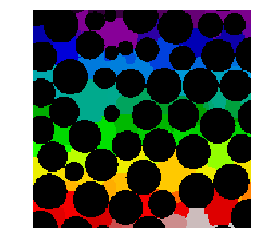

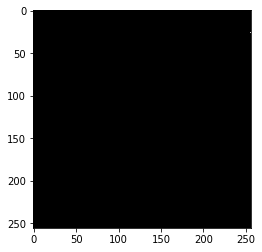

In [29]:
dt = spim.distance_transform_edt(input=beadPack)
dt = spim.gaussian_filter(input=dt, sigma=0.4)
peaks = ps.network_extraction.find_peaks(dt=dt, r=4)

peaks = ps.network_extraction.trim_saddle_points(peaks=peaks, dt=dt)
peaks = ps.network_extraction.trim_nearby_peaks(peaks=peaks, dt=dt)

regions = ps.network_extraction.partition_pore_space(im=dt, peaks=peaks)

plt.figure(1)
plt.imshow((regions*beadPack)[:, :, 50], cmap=plt.cm.nipy_spectral)
plt.axis('off')

im = regions*beadPack
im = im.astype(np.int64)
net = ps.network_extraction.extract_pore_network(im=im, dt=dt)

In [30]:
net.keys()

dict_keys(['pore.all', 'throat.all', 'pore.coords', 'pore.centroid', 'throat.centroid', 'throat.conns', 'pore.label', 'pore.volume', 'throat.volume', 'pore.diameter', 'pore.inscribed_diameter', 'pore.equivalent_diameter', 'pore.extended_diameter', 'pore.surface_area', 'pore.solid_area', 'throat.diameter', 'throat.inscribed_diameter', 'throat.area', 'throat.perimeter', 'throat.equivalent_diameter', 'throat.total_length', 'throat.length', 'throat.direct_length'])

In [80]:
net.get("pore.label")

from collections import OrderedDict
test = OrderedDict(sorted(net.items(),key=lambda t: t[0]))

net.get("pore.label")

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [108]:
len(beadPack)
velocities = {}
velocities.setdefault(str(net.get("pore.label")[1]),[])


print(velocities)
velocities['2'].append(1)
print(velocities)
velocities['2'].append(36)
print(velocities)

sum(velocities['2'])/len(velocities['2'])


{'2': []}
{'2': [1]}
{'2': [1, 36]}


18.5

In [117]:
cubeSize = len(beadPack)

velocities = {}

regionMap = regions*beadPack

for a in range(0, cubeSize): 
    for b in range(0, cubeSize):
        for c in range(0, cubeSize):
            
            #print(beadPack[a,b,c])
                        
            key = str(regionMap[a,b,c])
            if key != '0.0':
                if key in velocities:
                    velocities[key].append(velocityNormData[a,b,c])
                else:
                    velocities.setdefault(key,[])
                    velocities[key].append(velocityNormData[a,b,c])
        
            

print(velocities)            
            
            
            

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)

